In [24]:
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
ambientes = ["python-cache", "python-no-cache", "ruby-cache", "ruby-no-cache"]
qtd_usuarios_teste = ["30", "60", "90"]

folder_to_label_map = {
    "python-cache": "Python (Cache)",
    "python-no-cache": "Python (No Cache)",
    "ruby-cache": "Ruby (Cache)",
    "ruby-no-cache": "Ruby (No Cache)",
}

df_results = pd.DataFrame()

for ambiente in ambientes:
    for qtd_usuario in qtd_usuarios_teste:
        df = pd.read_csv(f"tests/le/{ambiente}/{qtd_usuario}/rst_stats.csv")
        df["Ambiente Label"] = folder_to_label_map[ambiente]
        df["Users Size"] = qtd_usuario
        df["95%"] = df["95%"] / 1000
        df_results = pd.concat([df_results, df]).reset_index(drop=True)
        df_results = df_results[df_results["Name"] == "Aggregated"]

df_results

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,80%,90%,95%,98%,99%,99.9%,99.99%,100%,Ambiente Label,Users Size
0,NaN,Aggregated,570,0,15.0,28.402209,13.9111,1006.9659,72508.333333,1.914932,...,17,24,0.035,370,400,1000,1000,1000,Python (Cache),30
1,NaN,Aggregated,585,0,15.0,17.416284,13.9234,63.5899,72508.333333,1.972459,...,17,23,0.033,37,44,64,64,64,Python (Cache),60
2,NaN,Aggregated,585,0,15.0,17.082073,14.0478,43.3438,72508.333333,1.989563,...,16,23,0.032,35,37,43,43,43,Python (Cache),90
3,NaN,Aggregated,324,0,390.0,452.580361,287.9559,1491.8637,73337.212963,1.084997,...,430,710,0.980,1000,1000,1500,1500,1500,Python (No Cache),30
4,NaN,Aggregated,330,0,390.0,441.912463,294.1275,1015.9036,72377.333333,1.107041,...,430,680,0.980,990,990,1000,1000,1000,Python (No Cache),60
5,NaN,Aggregated,317,0,390.0,445.050282,291.6748,1004.0982,73501.217666,1.059119,...,430,710,0.980,990,990,1000,1000,1000,Python (No Cache),90
6,NaN,Aggregated,570,0,5.0,15.430492,2.4743,748.7624,71690.600000,1.931612,...,6,13,0.023,330,340,750,750,750,Ruby (Cache),30
7,NaN,Aggregated,615,0,5.0,6.307127,2.3960,29.8381,71690.600000,2.092503,...,5,12,0.022,24,24,30,30,30,Ruby (Cache),60
8,NaN,Aggregated,585,0,5.0,6.261214,2.4420,34.6177,71690.600000,1.968720,...,5,12,0.022,24,25,35,35,35,Ruby (Cache),90
9,NaN,Aggregated,351,0,340.0,350.645730,2.7891,722.3849,72945.957265,1.172132,...,370,520,0.660,680,700,720,720,720,Ruby (No Cache),30


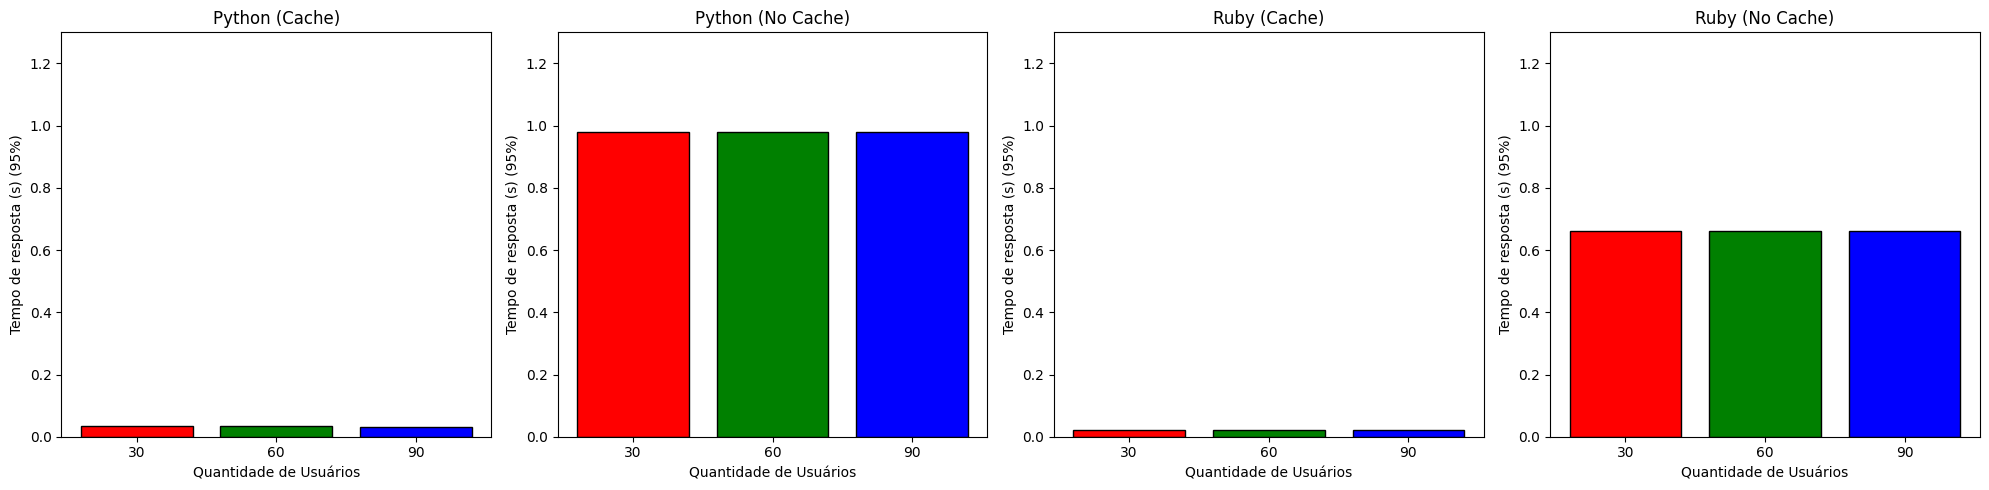

In [26]:
width_fig = 5

qtd_ambientes = len(ambientes)
fig, axs = plt.subplots(
    1, qtd_ambientes, tight_layout=True, figsize=(qtd_ambientes * width_fig, width_fig)
)

colors = ["red", "green", "blue"]

for i, ambiente in enumerate(ambientes):
    ambiente_label = folder_to_label_map[ambiente]

    df = df_results[df_results["Ambiente Label"] == ambiente_label]
    axs[i].set_ylim(0, 1.3)
    axs[i].set_title(ambiente_label)
    axs[i].bar(
        df["Users Size"],
        df["95%"],
        color=colors,
        edgecolor="black",
    )
    axs[i].set_xlabel("Quantidade de Usuários")
    axs[i].set_ylabel("Tempo de resposta (s) (95%)")

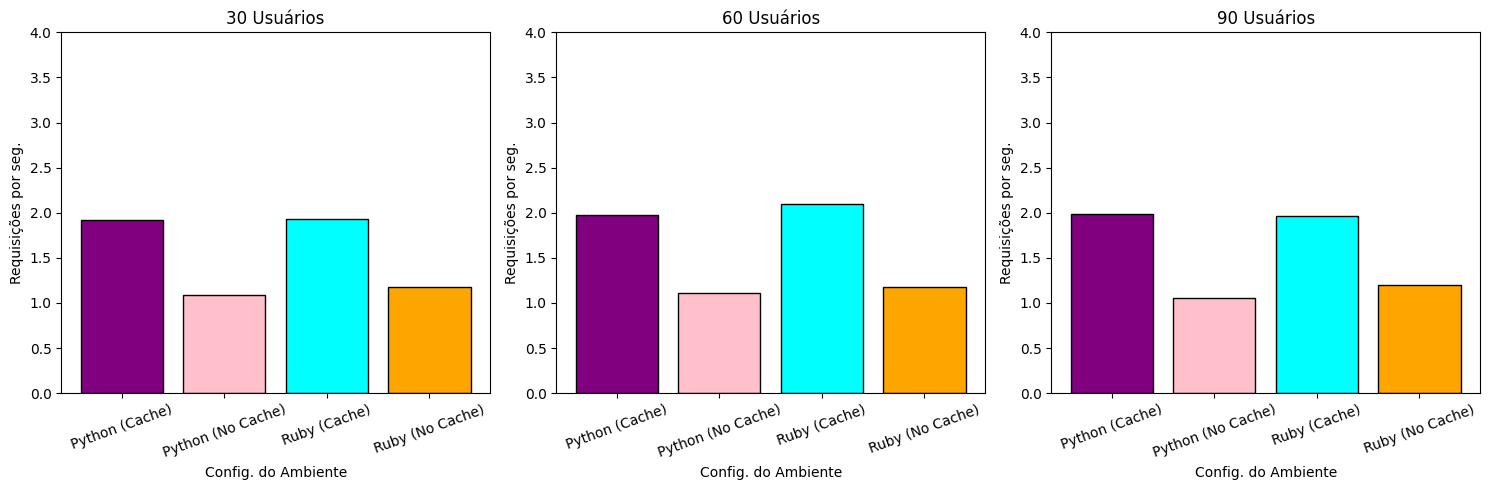

In [27]:
qtd_qtd_usuarios = len(qtd_usuarios_teste)
fig, axs = plt.subplots(
    1,
    qtd_qtd_usuarios,
    tight_layout=True,
    figsize=(qtd_qtd_usuarios * width_fig, width_fig),
)

colors = ["purple", "pink", "cyan", "orange"]

for i, qtd_usuario in enumerate(qtd_usuarios_teste):
    df = df_results[df_results["Users Size"] == qtd_usuario]
    axs[i].set_ylim(0, 4)
    axs[i].set_title(f"{qtd_usuario} Usuários")
    axs[i].bar(
        df["Ambiente Label"],
        df["Requests/s"],
        color=colors,
        edgecolor="black",
    )
    axs[i].set_xlabel("Config. do Ambiente")
    axs[i].set_ylabel("Requisições por seg.")
    axs[i].tick_params(axis="x", rotation=20)